In [286]:

# ignore metric did not predict warning
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean, mode
from pathlib import Path
from imblearn.pipeline import Pipeline
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, StratifiedKFold, GridSearchCV, cross_val_score, cross_validate, validation_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE  

In [287]:
# Loading data
file_path = Path("../eda/reduced_filtered_df.csv")
df = pd.read_csv(file_path)
df.head(1)

,ACD,LT,VCD,SPORTHR,DADMY,delta_spheq,total_positive_screen,MYOPIC
0,3.702,3.392,15.29,4,1,1.358,8,0


In [288]:
# Define X,y
label = df["MYOPIC"]
X = df.iloc[:,:-1].copy()
len(X)

372

In [289]:
over = SMOTE()
X, label = over.fit_resample(X, label)
print(len(X))

646


## Training X Variance

In [290]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()


In [291]:
params = {'n_estimators': 5,
 'max_leaves': 4,
 'min_child_weight': 3.5806456485030385,
 'learning_rate': 0.4359086627863047,
 'subsample': 1.0,
 'colsample_bylevel': 0.9122163035553499,
 'colsample_bytree': 0.9599028390069959,
 'reg_alpha': 0.11831815110092216,
 'reg_lambda': 0.07223617575057466
 }

model.set_params(**params)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scoring = ('neg_log_loss','f1', 'recall', 'precision', 'roc_auc', 'accuracy')

In [292]:

train_split=[]
train_log_loss_mean=[]
train_log_loss_stdev=[]
test_split=[]
test_log_loss_mean=[]
test_log_loss_stdev=[]


In [293]:
def metrics(scores):
    print("LogLoss")
    print(np.mean(scores['test_neg_log_loss']))
    print(np.std(scores['test_neg_log_loss']))
    print("Test Accuracy")
    print(np.mean(scores['test_accuracy']))
    print(np.std(scores['test_accuracy']))
    print("ROC_AUC")
    print(np.mean(scores['test_roc_auc']))
    print(np.std(scores['test_roc_auc']))
    print("Precision")
    print(np.mean(scores['test_precision']))
    print(np.std(scores['test_precision']))
    

In [294]:
# Holdback Method with stratify as True
X_train90, X_test10, y_train90, y_test10 = train_test_split(X, label, random_state=42, stratify=label, train_size=0.9)
print("Rows: ",len(X_train90))

scores = cross_validate(model, X_train90, y_train90, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
train_split.append(90)
train_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
train_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))

Rows:  581
LogLoss
-0.3312370126936047
0.05918700751658426
Test Accuracy
0.8634521722189752
0.05364723877712994
ROC_AUC
0.9361646188400051
0.02862875086179146
Precision
0.8442506405760021
0.0628511741161162


In [295]:
X_train80, X_test11, y_train80, y_test11 = train_test_split(X_train90, y_train90, random_state=42, stratify=y_train90, train_size=0.889)
print("Rows: ",len(X_train80))
scores = cross_validate(model, X_train80, y_train80, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
train_split.append(80)
train_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
train_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))


Rows:  516
LogLoss
-0.34000818764009977
0.059610813083765334
Test Accuracy
0.859904474610357
0.04494754004847733
ROC_AUC
0.933896449704142
0.03421123596490652
Precision
0.8504004396850554
0.06720486793574036


In [296]:
X_train70, X_test12, y_train70, y_test12 = train_test_split(X_train80, y_train80, random_state=42, stratify=y_train80, train_size=0.875)
print("Rows: ",len(X_train70))
scores = cross_validate(model, X_train70, y_train70, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
train_split.append(70)
train_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
train_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))

Rows:  451
LogLoss
-0.3411684070825119
0.07080163191378888
Test Accuracy
0.8662479871175524
0.04830559299628522
ROC_AUC
0.9336082946668955
0.03659656762335809
Precision
0.8495276309841526
0.05173633141024571


In [297]:
X_train60, X_test14, y_train60, y_test14 = train_test_split(X_train70, y_train70, random_state=42, stratify=y_train70, train_size=0.857)
print("Rows: ",len(X_train60))
scores = cross_validate(model, X_train60, y_train60, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
train_split.append(60)
train_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
train_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))

Rows:  386
LogLoss
-0.3705211604675754
0.08158893689907912
Test Accuracy
0.8583220872694557
0.06296104216630441
ROC_AUC
0.9105240073868882
0.04768493593414256
Precision
0.8452433751393907
0.06493416936326823


In [298]:
X_train50, X_test16, y_train50, y_test16 = train_test_split(X_train60, y_train60, random_state=42, stratify=y_train60, train_size=0.833)
print("Rows: ",len(X_train50))
scores = cross_validate(model, X_train50, y_train50, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
train_split.append(50)
train_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
train_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))

Rows:  321
LogLoss
-0.3682220345389282
0.08895215692953537
Test Accuracy
0.8482638888888889
0.05539283482957509
ROC_AUC
0.9160232843137256
0.05401688255390508
Precision
0.835654140607701
0.06999899564305671


## Testing Variance

In [299]:
# Holdback Method with stratify as True
X_train51, X_test50, y_train51, y_test50 = train_test_split(X, label, random_state=42, stratify=label, train_size=0.5)
print("Rows: ",len(X_test50))
scores = cross_validate(model, X_test50, y_test50, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
test_split.append(50)
test_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
test_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))

Rows:  323
LogLoss
-0.3732476775673484
0.08536867893089496
Test Accuracy
0.8358270202020203
0.06052535826642208
ROC_AUC
0.9120634191176471
0.04414514021560086
Precision
0.8083057316493849
0.08222400109379649


In [300]:
X_train20, X_test40, y_train20, y_test40 = train_test_split(X_test50, y_test50, random_state=42, stratify=y_test50, test_size=0.8)
print("Rows: ",len(X_test40))
scores = cross_validate(model, X_test40, y_test40, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
test_split.append(60)
test_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
test_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))

Rows:  259
LogLoss
-0.3660171106453091
0.11060847160308852
Test Accuracy
0.8470769230769228
0.0743578426085403
ROC_AUC
0.9226824457593688
0.05975514902036988
Precision
0.8230334942834943
0.0768523139892128


In [301]:
X_train25, X_test30, y_train25, y_test30 = train_test_split(X_test40, y_test40, random_state=42, stratify=y_test40, test_size=0.75)
print("Rows: ",len(X_test30))
scores = cross_validate(model, X_test30, y_test30, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
test_split.append(70)
test_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
test_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))

Rows:  195
LogLoss
-0.3848521134837531
0.1512671223966034
Test Accuracy
0.8357894736842104
0.09689929661360049
ROC_AUC
0.9050740740740741
0.08536061645893649
Precision
0.8331759906759906
0.11750230102450575


In [302]:
X_train33, X_test20, y_train33, y_test20 = train_test_split(X_test30, y_test30, random_state=42, stratify=y_test30, test_size=0.666)
print("Rows: ",len(X_test20))
scores = cross_validate(model, X_test20, y_test20, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
test_split.append(80)
test_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
test_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))

Rows:  130
LogLoss
-0.331629219690503
0.12141743145680274
Test Accuracy
0.8897435897435899
0.08352049987129401
ROC_AUC
0.940079365079365
0.057133211267003194
Precision
0.8559920634920636
0.11121883241972672


In [303]:
X_train49, X_test10, y_train49, y_test10 = train_test_split(X_test20, y_test20, random_state=42, stratify=y_test20, test_size=0.5)
print("Rows: ",len(X_test10))
scores = cross_validate(model, X_test10, y_test10, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
test_split.append(90)
test_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
test_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))

Rows:  65
LogLoss
-0.37645668735257654
0.18650730470956395
Test Accuracy
0.8476190476190477
0.14200805870695263
ROC_AUC
0.9310185185185185
0.11511776787320772
Precision
0.865
0.2147931821802338


In [315]:
print(test_split)
print(train_log_loss_stdev)
print(test_log_loss_stdev)
total_stdev = [ v + test_log_loss_stdev[i] for i,v in enumerate(train_log_loss_stdev)]
print(total_stdev)

[50, 60, 70, 80, 90]
[0.05918700751658426, 0.059610813083765334, 0.07080163191378888, 0.08158893689907912, 0.08895215692953537]
[0.08536867893089496, 0.11060847160308852, 0.1512671223966034, 0.12141743145680274, 0.18650730470956395]
[0.14455568644747924, 0.17021928468685385, 0.22206875431039227, 0.20300636835588187, 0.2754594616390993]


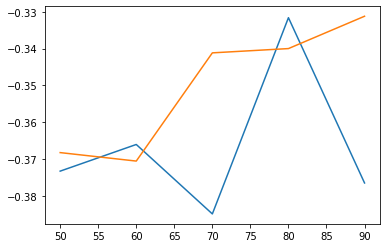

In [305]:
plt.subplot(1,1,1)
plt.plot(test_split, test_log_loss_mean, label="Test")
plt.plot(train_split, train_log_loss_mean, label="Train")
plt.xlabel("X Train Percent of Total")
plt.ylabel("Mean Error")
plt.legend()

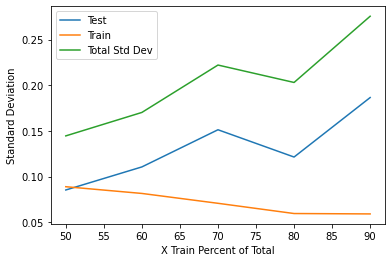

In [317]:
plt.subplot(1,1,1)
plt.plot(test_split, test_log_loss_stdev, label="Test")
plt.plot(train_split, train_log_loss_stdev, label="Train")
plt.plot(test_split, total_stdev, label="Total Std Dev")
plt.xlabel("X Train Percent of Total")
plt.ylabel("Standard Deviation")
plt.legend()

From this information, it looks like the best choice for minimizing the standard deviation is with the data split 50/50.  The X train split does not vary much after 75% of the data is used for training and 25% of the data samples results in about 0.12 standard deviation.  Although I see a dip aroudn 80%, that is probably just sampling effects and I am assuming the trendline of this line is probably the most realistic.  

The trends make sense.  As X Train becomes larger the standard deviation in the model decreases for training but the test dataset is getting smaller so the standard deviation becomes larger for it.  

Choosing the best option is probably to run cross validation on a dataset that is closer to 50/50.  I think I would go with a 60/40 split or a 65/35 split.  The rate that the testing data variation increases is much more rapid than the training data.

Also keep in mind that this is for synthetically balanced data.

